In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter, sobel
import scipy
from collections import defaultdict

/tmp/ipykernel_26046/1976515095.py:4: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter, sobel
/tmp/ipykernel_26046/1976515095.py:4: DeprecationWarning: Please use `sobel` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter, sobel


In [5]:
name = "slot8.02"

original_image = Image.open(f"resources/{name}.tif")

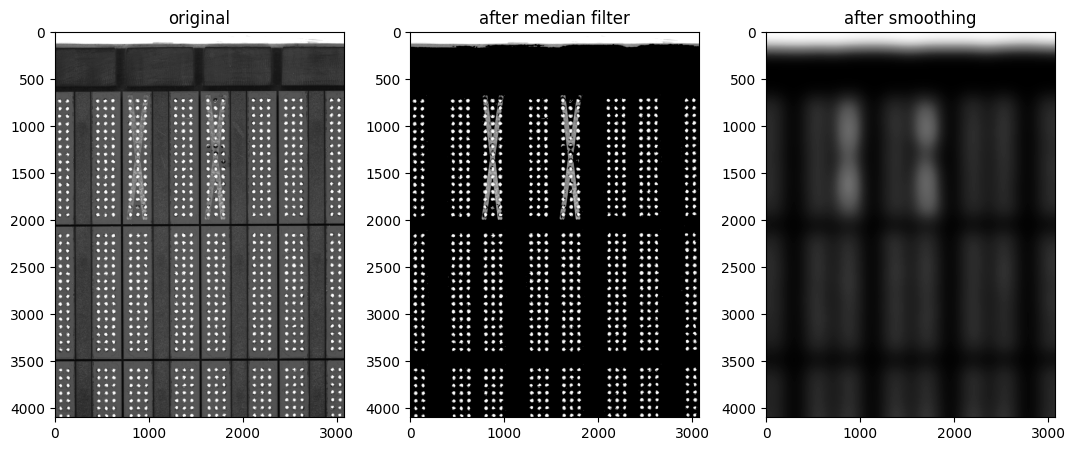

In [6]:
original = np.array(original_image)
plt.figure(figsize = (13,5))
plt.subplot(1, 3, 1)

plt.title("original")
plt.imshow(original, cmap="Greys_r")
org = original.copy()

original = scipy.signal.medfilt(original, 7)
original = 255*((original - np.min(original))/(np.max(original)-np.min(original)))
original[original < 100] = 0

plt.subplot(1, 3, 2)
plt.title("after median filter")
plt.imshow(original, cmap="Greys_r")

n = 3

for i in range(n):
    original = gaussian_filter(original, sigma=55)

plt.subplot(1, 3, 3)
plt.title("after smoothing")
plt.imshow(original, cmap="Greys_r")

Text(0.5, 1.0, 'Package mask')

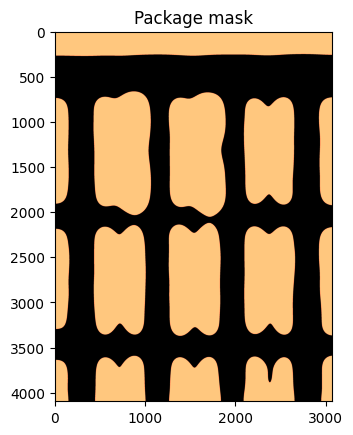

In [7]:
mid = np.percentile(original, 50)
plt.imshow(original >= mid, cmap="copper")

masked = original >= mid

plt.title("Package mask")

In [8]:
vl = 0
vr = len(masked[0])-1
ht = 0
hb = len(masked)-1

d = 10

fb = False
while vr != 0 and np.count_nonzero(masked[:,vr]) == len(masked):
    vr -= 1
    fb = True
if fb:
    while vr != 0 and np.count_nonzero(masked[:,vr]) != 0:
        vr -= 1
while vr != 0 and np.count_nonzero(masked[:,vr]) == 0:
    vr -= 1

fb = False
while vl != len(masked[0]) and np.count_nonzero(masked[:,vl]) == len(masked):
    vl += 1
    fb = True
if fb:
    while vl != len(masked[0]) and np.count_nonzero(masked[:,vl]) != 0:
        vl += 1
while vl != len(masked[0]) and np.count_nonzero(masked[:,vl]) == 0:
    vl += 1

fb = False
while hb != 0 and np.count_nonzero(masked[hb,:]) == len(masked[0]):
    hb -= 1
    fb = True
if fb:
    while hb != 0 and np.count_nonzero(masked[hb,:]) != 0:
        hb -= 1
while hb != 0 and np.count_nonzero(masked[hb,:]) == 0:
    hb -= 1

fb = False
while ht != len(masked) and np.count_nonzero(masked[ht,:]) == len(masked[0]):
    ht += 1
    fb = True
if fb:
    while ht != len(masked) and np.count_nonzero(masked[ht,:]) != 0:
        ht += 1
while ht != len(masked) and np.count_nonzero(masked[ht,:]) == 0:
    ht += 1

Text(0.5, 1.0, 'Rough edge detection')

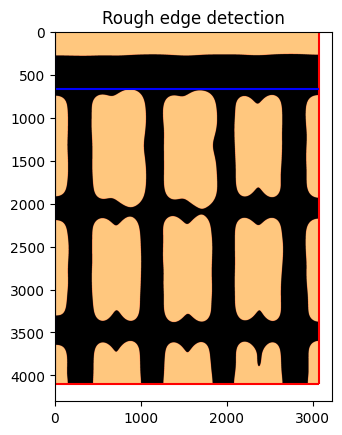

In [9]:
plt.imshow(masked, cmap="copper")
plt.vlines(vr, 0, len(masked), color="r")
plt.vlines(vl, 0, len(masked), color="b")

plt.hlines(hb, 0, len(masked[0]), color="r")
plt.hlines(ht, 0, len(masked[0]), color="b")

plt.title("Rough edge detection")

In [10]:
if ht == len(masked):
    ht = 0
else:
    ht -= d
    ht = max(ht ,0)

if hb == 0:
    hb = len(masked)
else:
    hb += d
    hb = min(hb, len(masked))

if ht >= hb:
    if ht >= len(masked)//2:
        ht = 0
    else:
        hb = len(masked)

if vl == len(masked[0]):
    vl = 0
else:
    vl -= d
    vl = max(vl ,0)

if vr == 0:
    vr = len(masked[0])
else:
    vr += d
    vr = min(vr, len(masked[0]))

if vl >= vr:
    if vl >= len(masked[0])//2:
        vl = 0
    else:
        vr = len(masked[0])

Text(0.5, 1.0, 'Cropped image')

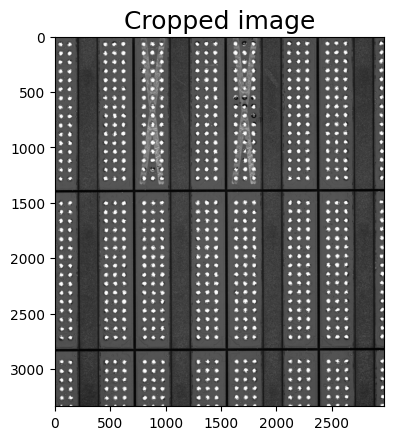

In [11]:
plt.imshow(np.asarray(original_image)[ht:hb-100,vl:vr-100], cmap="Greys_r")

plt.title("Cropped image", fontsize=18)

In [12]:
org = np.array(original_image)

tmm = 10
tml = 10

tick = 0
tm = tmm
if np.mean(org[:,vr-1]) > 50:
    tm = tml
while vr < len(org[0]):
    if np.mean(org[:,vr]) < 50:
        if tick < tm:
            tick += 1
        else:
            break
    vr += 1

tick = 0
tm = tmm
if np.mean(org[:,vl]) > 50:
    tm = tml
while vl > 0:
    if np.mean(org[:,vl]) < 50:
        if tick < tm:
            tick += 1
        else:
            break
    vl -= 1

tick = 0
tm = tmm
if np.mean(org[hb-1,:]) > 50:
    tm = tml
while hb < len(org):
    if np.mean(org[hb,:]) < 50:
        if tick < tm:
            tick += 1
        else:
            break
    hb += 1

tick = 0
tm = tmm
if np.mean(org[ht,:]) > 50:
    tm = tml
while ht > 0:
    if np.mean(org[ht,:]) < 50:
        if tick < tm:
            tick += 1
        else:
            break
    ht -= 1

In [13]:
if ht >= hb:
    if ht >= len(masked)//2:
        ht = 0
    else:
        hb = len(masked)

if vl >= vr:
    if vl >= len(masked[0])//2:
        vl = 0
    else:
        vr = len(masked[0])

Text(0.5, 1.0, 'Cropped image edge correction')

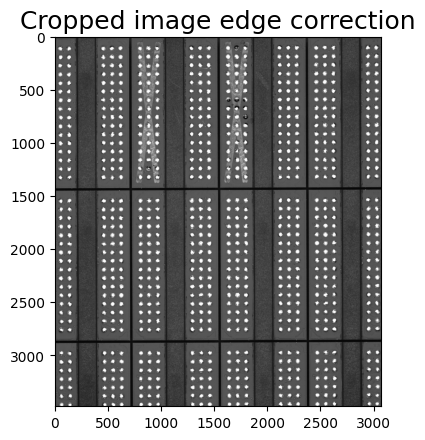

In [14]:
plt.imshow(np.asarray(original_image)[ht:hb,vl:vr], cmap="Greys_r")

plt.title("Cropped image edge correction", fontsize=18)

In [27]:
im = Image.fromarray(np.asarray(original_image)[ht:hb,vl:vr])
im.save(f"cropped/{name}.tif")